In [48]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as im
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import seaborn as sns #For visualization purpose
from sklearn.metrics import classification_report,confusion_matrix #For model evaluation metrics
from sklearn.model_selection import train_test_split # For Spliting data to training and testing data
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [49]:
data = pd.read_csv('breast_cancer/wdbc.data',delimiter = ',',header=None)

# Drop column related to patient ID
data.drop(data.columns[0], axis=1, inplace=True)
# Select target column
targets = data.iloc[:, 0]
targets = targets.map({'M': 0, 'B': 1})

# Drop target column from training set
data.drop(data.columns[0], axis=1, inplace=True)

# Split data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(data,targets,test_size=0.25,random_state=101)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check correct dimensions of data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


In [50]:
# Build neural network architecture
model = Sequential()
model.add(Input(shape=(data.shape[1],)))  # Input layer specifies the shape
model.add(Dense(16, activation='sigmoid'))  # Remove input_dim here
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
es = EarlyStopping(patience=10, restore_best_weights=True)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Set fixed seed for reproducibility
np.random.seed(1)


In [51]:
# Train the model
history = model.fit(X_train,y_train, validation_split=0.2, epochs=500, batch_size=10, callbacks=[es])

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6263 - loss: 0.6419 - val_accuracy: 0.6047 - val_loss: 0.6125
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6390 - loss: 0.5888 - val_accuracy: 0.6047 - val_loss: 0.5539
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6640 - loss: 0.5366 - val_accuracy: 0.7791 - val_loss: 0.4946
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7641 - loss: 0.5025 - val_accuracy: 0.8605 - val_loss: 0.4375
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8817 - loss: 0.4342 - val_accuracy: 0.9070 - val_loss: 0.3867
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9248 - loss: 0.3731 - val_accuracy: 0.9302 - val_loss: 0.3428
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9418 - loss: 0.3375 - val_accuracy: 0.9419 - val_loss: 0.3055
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9463 - loss: 0.3028 - val_accuracy: 0.9535 - 

In [52]:
# Print summary data
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,925 (7.52 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,284 (5.02 KB)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9874 - loss: 0.0535 
Train score: [0.035990823060274124, 0.9906103014945984]
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9681 - loss: 0.0803 
Test score: [0.08231300860643387, 0.9720279574394226]
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


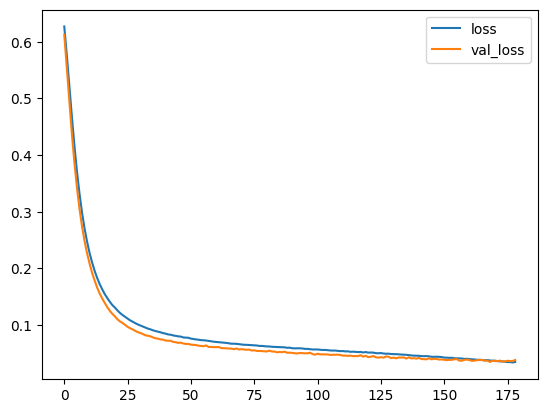

In [53]:
print("Train score:", model.evaluate(X_train, y_train)) # Evaluate returns loss and accuracy on train set
print("Test score:", model.evaluate(X_test, y_test)) # Evaluate returns loss and accuracy on test set

# Predict the target values for the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


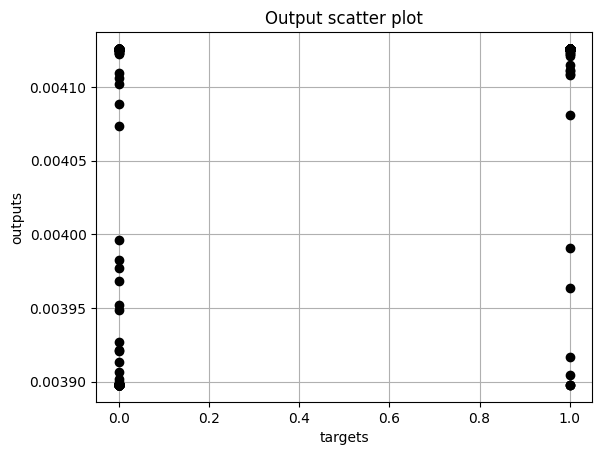

In [54]:
# Plot target-output relationship (ideal: targets == outputs, straight line)
outputs = model.predict(data)
plt.plot(targets,outputs,'ok')
plt.title('Output scatter plot')
plt.xlabel('targets')
plt.ylabel('outputs')
plt.grid()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


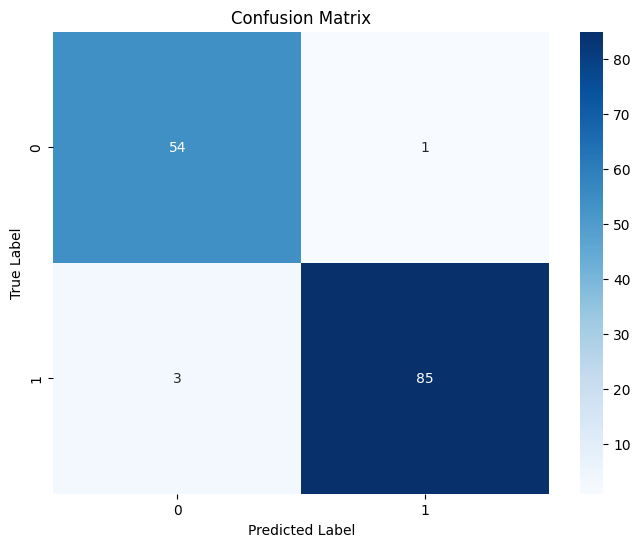

In [55]:
# Predict the target values for the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()